<a href="https://colab.research.google.com/github/ptk18/DeepLearningKMITL/blob/main/65011466_MNIST_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #advanced math library
import matplotlib.pyplot as plt # MATLAB like plotting routines
import random # for generating random numbers

from keras.datasets import mnist #MNIST dataset is included in Keras
from keras.models import Sequential # Model type to be used

from keras.layers import Dense, Dropout, Activation #Types of layers to be used in our model
from tensorflow.keras.utils import to_categorical # Updated import for to_categorical

In [ ]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

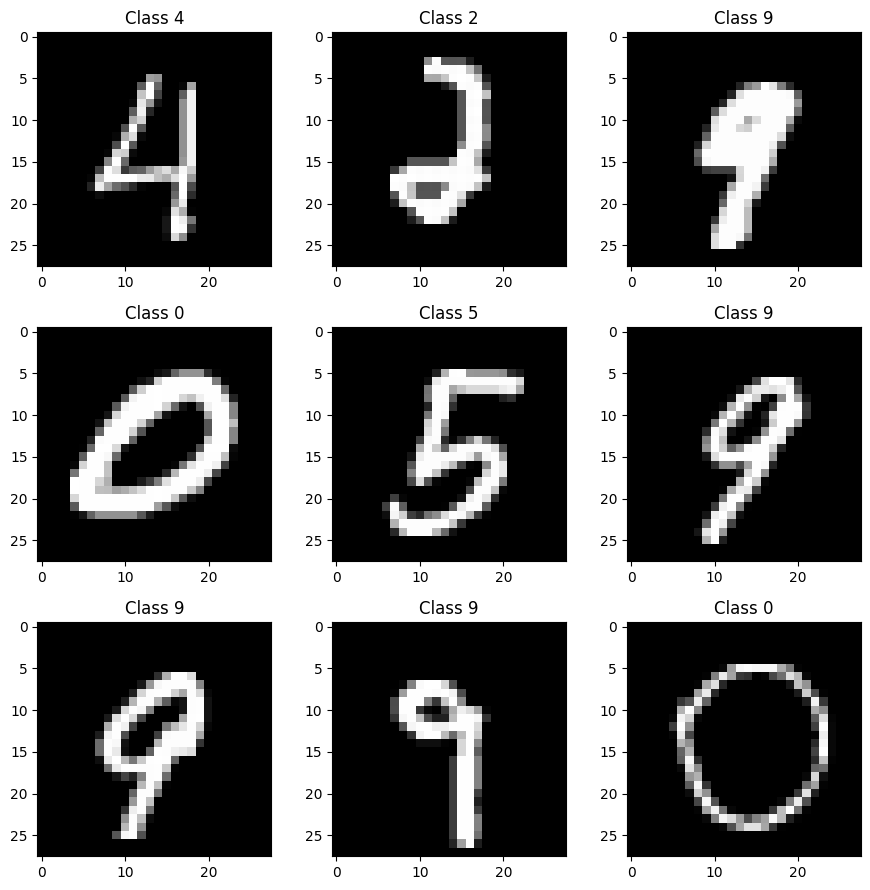

In [ ]:
for i in range(9):
  plt.subplot(3,3,i+1)
  num = random.randint(0, len(X_train))
  plt.imshow(X_train[num], cmap='gray', interpolation='none')
  plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [ ]:
#just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
      for i, y in enumerate(x):
        print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
      print("")

# now print!
matprint(X_train[num])

0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    8  157  247  252  247  247  247  172  120    4    0    0    0  0  0  0  0  
0  0  0  0  0   0    0    0    0    3  128  235  163   57   48    0    5   74  111  224  184    8    0    0  0  0  0  0  
0  0  0  0  0   0    0    0    4  168  225   40    0    0    0    0    0    0    0   24  194  148    0    0  0  0  0  0  
0  0  0  0  0   0    0  

In [ ]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784
X_test = X_test.reshape(10000, 784) # reshape 10,000 28 x 28 matrices into 10,000 78

X_train = X_train.astype('float32') # change integers to 32-bit floating point
X_test = X_test.astype('float32')

X_train /= 255 # normalize each value for each pixel for the entire vector for each input
X_test /= 255 # normalize each value for each pixel for the entire vector for each

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
nb_classes = 10 # number of unique digits

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [ ]:
# The Sequential model is a linear stack of layers and is very common

model = Sequential()

In [ ]:
# The first hidden layer is a set of 512 nodes (artificial neurons).
# Each node will recieve an element from each input vector and apply some weight and bias to it

model.add(Dense(512, input_shape=(784,))) # (784,) is not a typo -- that represents a 784 length vector!
model.add(Activation('relu')) # Rectified Linear Unit is the activation function
model.add(Dropout(0.2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# The second layer appears identical to our first layer
# However, instead of each of the 512-node receiving 784-inputs from the input image data,
# They receive 512 inputs from the output of the first 512-node layer

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [ ]:
# The final layer of 10 neurons in fully-connected to the previous 512-node layer.
# The final layer of a FCN should be equal to the number of desired classes (10 in this case)
model.add(Dense(10))
# The "softmax" activation represents a probility distribution over K different possible outcomes.
# its values are all non-negative and sum to 1

model.add(Activation('softmax'))
#Summarize the built model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_24 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Let's use the Adam optimizer for learning
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.8613 - loss: 0.4551
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9670 - loss: 0.1065
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9768 - loss: 0.0718
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9825 - loss: 0.0530
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9869 - loss: 0.0407
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9879 - loss: 0.0386
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9901 - loss: 0.0326
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9910 - loss: 0.0264
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9913 - loss: 0.0261
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9905 - loss: 0.0280


In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9806 - loss: 0.0842
Test score: 0.07059864699840546
Test accuracy: 0.9830999970436096


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<Figure size 900x900 with 0 Axes>

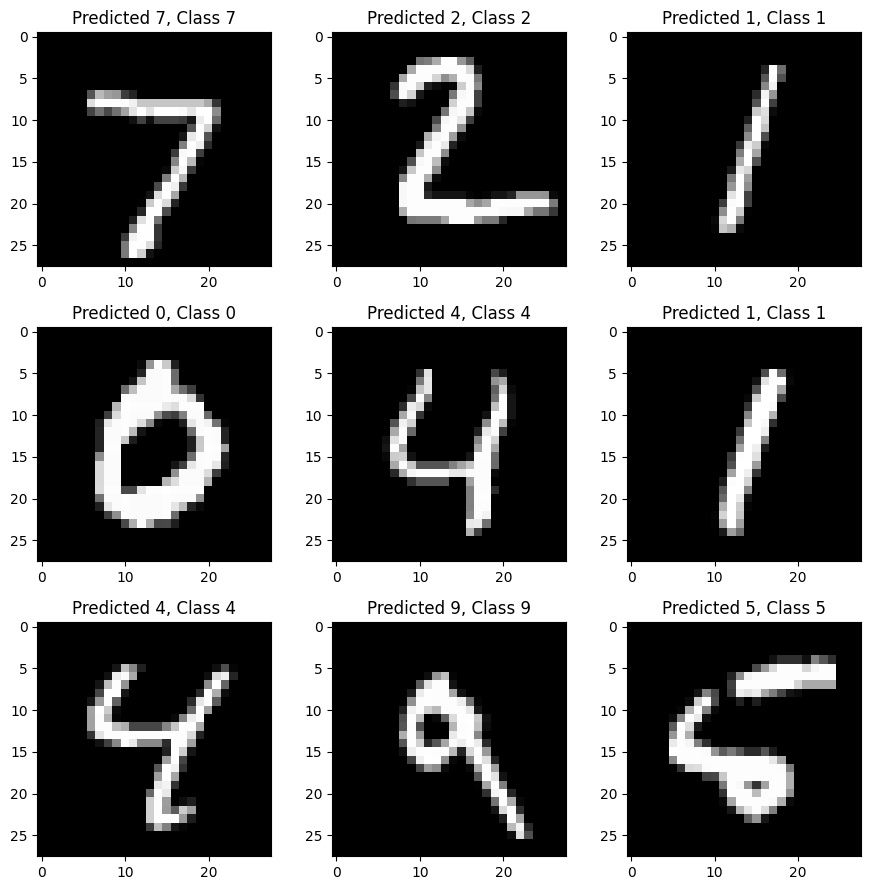

In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example
predicted_probabilities = model.predict(X_test)

# Get the class with the highest probability for each input
predicted_classes = np.argmax(predicted_probabilities, axis=1)
# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

plt.tight_layout()

plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.tight_layout()

In [ ]:
# import some additional tools

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
#from keras.layers.normalization import BatchNormalization # Deprecated
from keras.layers import BatchNormalization # Use keras.layers.BatchNormalization

# Reload the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 25

print('Training matrix shape:', X_train.shape)
print('Testing matrix shape:', X_test.shape)

# one-hot format classes
nb_classes = 10
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

model = Sequential() #Linear Stacking layers

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1)) # normalizes activation outputs
convLayer01 = (Activation('relu')) # activation
model.add(convLayer01)

# Convolutional Layer 2
model.add(Conv2D(32, (3, 3))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1)) # normalizes activation outputs
model.add(Activation('relu')) # activation
convLayer02 = MaxPooling2D(pool_size=(2,2)) # Pool the max values ove a 2x2 kernel
model.add(convLayer02)

# Convolutional Layer 3
model.add(Conv2D(64, (3, 3))) # 64 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1)) # normalizes activation outputs
convLayer03 = (Activation('relu')) # activation
model.add(convLayer03)

# Convolutional Layer 4
model.add(Conv2D(64, (3, 3))) # 64 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1)) # normalizes activation outputs
model.add(Activation('relu')) # activation
convLayer04 = MaxPooling2D(pool_size=(2,2)) # Pool the max values ove a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())

#Fully Connected Layer 5
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))

#Fully Connected Layer 6
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

# we'll use the same optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# data augmentation prevents overfitting by slightly changing the data randomly

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

train_generator = gen.flow(X_train, Y_train, batch_size=128)

#model.fit(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, validation_data=test_gen, validation_steps=10000//128)
model.fit(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])


Training matrix shape: (60000, 28, 28, 1)
Testing matrix shape: (10000, 28, 28, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_31 (Activation)           │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_32 (Activation)           │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 10, 10, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_33 (Activation)           │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_34 (Activation)           │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_35 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │              

 Total params: 597,738 (2.28 MB)

 Trainable params: 596,330 (2.27 MB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


468/468 ━━━━━━━━━━━━━━━━━━━━ 194s 403ms/step - accuracy: 0.9097 - loss: 0.2823 - val_accuracy: 0.7740 - val_loss: 3.2392
Epoch 2/5
  1/468 ━━━━━━━━━━━━━━━━━━━━ 2:46 356ms/step - accuracy: 0.9844 - loss: 0.0442

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


468/468 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9844 - loss: 0.0442 - val_accuracy: 0.7774 - val_loss: 3.0362
Epoch 3/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 194s 403ms/step - accuracy: 0.9845 - loss: 0.0498 - val_accuracy: 0.6983 - val_loss: 8.6469
Epoch 4/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9922 - loss: 0.0163 - val_accuracy: 0.6971 - val_loss: 8.5374
Epoch 5/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 193s 398ms/step - accuracy: 0.9873 - loss: 0.0395 - val_accuracy: 0.7517 - val_loss: 5.5497
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7433 - loss: 5.6912
Test score: 5.549659252166748
Test accuracy: 0.7516999840736389


In [ ]:
from keras import backend as k

#choose any image to want by specifying the index
img = X_test[3]
img = np.expand_dims(img, axis=0)

def visualize(layer):
  inputs = [K.learning_phase()] + model.inputs

  _convout1_f = K.function(inputs, [layer.output])
